In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp -r "/content/drive/My Drive/Facial_Recognition_t10" /content/


In [ ]:
!find /content/Facial_Recognition_t10 -name "utils.py"


/content/Facial_Recognition_t10/models/face_recognition/utils.py


In [ ]:
import sys
sys.path.append("/content/Facial_Recognition_t10/models/face_recognition/")  # Adjust if needed


In [ ]:
!ls /content/Facial_Recognition_t10/models/face_recognition/


align.py			face-recognition.ipynb	model.png    README.md	       weights
data.py				images			model.py     requirements.txt
face-recognition-convert.ipynb	LICENSE			__pycache__  utils.py


**Facial Recognition**

In [ ]:
%cd /content/Facial_Recognition_t10/
%pwd
%ls

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Layer

from Facial_Recognition_t10.triplet_loss import TripletLossLayer
from Facial_Recognition_t10.lfw_preprocessor import LfwDataGenerator

%cd models/face_recognition/

%cd ../..

in_a = Input(shape=(96, 96, 3), name="img_a")
in_p = Input(shape=(96, 96, 3), name="img_p")
in_n = Input(shape=(96, 96, 3), name="img_n")

import sys
sys.path.append('/content/Facial_Recognition_t10')

from models.face_recognition.model import create_model



model_sm = create_model()


emb_a = model_sm(in_a)
emb_p = model_sm(in_p)
emb_n = model_sm(in_n)

triplet_loss_layer = TripletLossLayer(alpha=0.2, name='triplet_loss_layer')([emb_a, emb_p, emb_n])

facial_rec_model = Model([in_a, in_p, in_n], triplet_loss_layer)
facial_rec_model.load_weights("/content/Facial_Recognition_t10/epoch097_loss0.176.hdf5")
facial_rec_model.summary()

facial_rec_base_model = facial_rec_model.layers[3]

/content/Facial_Recognition_t10
checkpoint.pth  epoch097_loss0.176.hdf5    lfw_preprocessor.py  __pycache__/
detr/           face_recognition_dataset/  models/              triplet_loss.py
/content/Facial_Recognition_t10/models/face_recognition
/content/Facial_Recognition_t10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/zero_padding2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ img_a (InputLayer)        │ (None, 96, 96, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ img_p (InputLayer)        │ (None, 96, 96, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ img_n (InputLayer)        │ (None, 96, 96, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional (Functional)   │ (None, 128)            │      3,743,280 │ img_a[0][0],           │
│                           │                        │                │ img_p[0][0],           │
│                           │                        │                │ img_n[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ triplet_loss_layer        │ ()                     │              0 │ functional[0][0],      │
│ (TripletLossLayer)        │                        │                │ functional[1][0],      │
│                           │                        │                │ functional[2][0]       │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 3,743,280 (14.28 MB)

 Trainable params: 3,733,968 (14.24 MB)

 Non-trainable params: 9,312 (36.38 KB)

In [ ]:
!echo " " > /content/align.py

In [ ]:
def capture_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function capturePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({ video: true });

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
        ''')
    display(js)
    data = eval_js('capturePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

In [ ]:

import cv2
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from IPython.display import Image
import os


**Prendre une image pour tester**

In [ ]:
#try:
    #new_photo = capture_photo()
    #print(f'Saved the photo as: {new_photo}')
    #display(Image(new_photo))
#except Exception as error:
    #print(str(error))

#test_image_path = 'photo.jpg'
#test_image = cv2.imread(test_image_path)

# Appliquer un filtre gaussien à l'image de test pour réduire le bruit et lisser les détails !(phase pré-traitement)
#filtred_test_image = cv2.GaussianBlur(test_image, (5, 5), 0)

#test_image = filtred_test_image
#cv2_imshow(filtred_test_image)


In [ ]:
!echo " " > /content/triplet_loss.py


In [ ]:
!echo " " > /content/lfw_preprocessor.py


In [ ]:
def set_base_embeddings():
  embeddings = np.empty((49, 128))

  for i in range(49):
    print("now processing: face_recognition_dataset/" + str(i) + ".png" )
    img = load_image('face_recognition_dataset/' + str(i) + ".png")
    img = align_image(img)
    img = img.astype('float32')
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    embeddings[i] = facial_rec_base_model.predict(img)

  return embeddings

import csv
from numpy import asarray
def name_mapping():
  id_names = []
  with open('face_recognition_dataset/person_id_name_mapping.csv') as id_name_map_csv:
    csv_dict_reader = csv.DictReader(id_name_map_csv)
    for row in csv_dict_reader:
      id_names.append({
          "id": int(row["person_id"]),
          "name": row["person_name"]
      })
  return id_names
def preprocess(img, box):
  face = img.crop((int(box[0]), int(box[1]), int(box[2]), int(box[3])))
  face = asarray(face)
  face = face[...,::-1]
  face = align_image(face)
  face = face.astype('float32')
  face = face / 255.0
  face = np.expand_dims(face, axis=0)
  return face

def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

def infer(face):

  face_embed = facial_rec_base_model.predict(face)
  minDistance = distance(face_embed, embeddings[0])
  minIndex = 0


  for i in range(1, 49):
    if(distance(face_embed, embeddings[i]) < minDistance):
      minDistance = distance(face_embed, embeddings[i])
      minIndex = i
  return next(item for item in names if item["id"] == minIndex)["name"]

def align_image(img):
        alignment = AlignDlib('models/landmarks.dat')
        bb = alignment.getLargestFaceBoundingBox(img)
        if bb is None:
           return cv2.resize(img, (96,96))
        else:
            return alignment.align(96,
                                   img,
                                   bb,
                                   landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

**DETR Model**

In [ ]:
os.chdir('detr')

In [ ]:
import argparse
import random
from pathlib   import Path
import numpy as np
import torch
import torchvision.transforms as T
import matplotlib.pyplot as plt
import PIL.Image
import util.misc as utils
os.chdir('..')
import detr.models
from detr.models import build_model
!pip install pycocotools
os.chdir('detr')
%pwd
%ls
import pycocotools
from main import get_args_parser

d2/        Dockerfile  hubconf.py  main.py  __pycache__/  requirements.txt      test_all.py  util/
datasets/  engine.py   LICENSE     models/  README.md     run_with_submitit.py  tox.ini


In [ ]:
parser = argparse.ArgumentParser(description='DETR args parser', parents=[get_args_parser()])
args = parser.parse_args(args=[])
#This now loads the newly trained face detection weights
args.resume = 'checkpoint.pth'
args.device = 'cpu'

if args.output_dir:
    Path(args.output_dir).mkdir(parents=True, exist_ok=True)
args.distributed = False
print(args)

Namespace(lr=0.0001, lr_backbone=1e-05, batch_size=2, weight_decay=0.0001, epochs=300, lr_drop=200, clip_max_norm=0.1, frozen_weights=None, backbone='resnet50', dilation=False, position_embedding='sine', enc_layers=6, dec_layers=6, dim_feedforward=2048, hidden_dim=256, dropout=0.1, nheads=8, num_queries=100, pre_norm=False, masks=False, aux_loss=True, set_cost_class=1, set_cost_bbox=5, set_cost_giou=2, mask_loss_coef=1, dice_loss_coef=1, bbox_loss_coef=5, giou_loss_coef=2, eos_coef=0.1, dataset_file='coco', coco_path=None, coco_panoptic_path=None, remove_difficult=False, output_dir='', device='cpu', seed=42, resume='checkpoint.pth', start_epoch=0, eval=False, num_workers=2, world_size=1, dist_url='env://', distributed=False)


In [ ]:
face_detection_model, criterion, postprocessors = build_model(args)
device = torch.device(args.device)
face_detection_model.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DETR(
  (transformer): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-5): 6 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
          )
          (linear1): Linear(in_features=256, out_features=2048, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=2048, out_features=256, bias=True)
          (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (decoder): TransformerDecoder(
      (layers): ModuleList(
        (0-5): 6 x TransformerDecoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=256, ou

In [ ]:
os.chdir('..')

In [ ]:
output_dir = Path(args.output_dir)
if args.resume:
    if args.resume.startswith('https'):
        checkpoint = torch.hub.load_state_dict_from_url(
            args.resume, map_location='cpu', check_hash=True)
    else:
        checkpoint = torch.load(args.resume, map_location='cpu')
    face_detection_model.load_state_dict(checkpoint["model"], strict=True)

<ipython-input-20-c393ed2868f8>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(args.resume, map_location='cpu')


In [ ]:
CLASSES = ['none', 'person']
# colors for visualization
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

# standard PyTorch mean-std input image normalization
transform = T.Compose([
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# for output bounding box post-processing
def box_cxcywh_to_xyxy(x):
    x_c, y_c, w, h = x.unbind(1)
    b = [(x_c - 0.5 * w), (y_c - 0.5 * h),
         (x_c + 0.5 * w), (y_c + 0.5 * h)]
    return torch.stack(b, dim=1)

def rescale_bboxes(out_bbox, size):
    img_w, img_h = size
    b = box_cxcywh_to_xyxy(out_bbox)
    b = b * torch.tensor([img_w, img_h, img_w, img_h], dtype=torch.float32)
    return b

In [ ]:
def detect(im, model, transform):
    img = transform(im).unsqueeze(0)
    assert img.shape[-2] <= 1600 and img.shape[-1] <= 1600, 'Demo model only supports images up to 1600 pixels on each side'

    outputs = model(img)

    probas = outputs['pred_logits'].softmax(-1)[0, :, :-1]
    keep = probas.max(-1).values > 0.7

    # Rescale bounding boxes to the original image size
    bboxes_scaled = rescale_bboxes(outputs['pred_boxes'][0, keep], im.size)

    return probas[keep], bboxes_scaled

In [ ]:
def plot_results(pil_img, prob, boxes, classes):
    plt.figure(figsize=(16, 10))
    plt.imshow(pil_img)
    ax = plt.gca()

    # Iterate through each detection
    for p, (xmin, ymin, xmax, ymax), c in zip(prob, boxes.tolist(), COLORS * 100):
        c1 = p.argmax()
        if CLASSES[c1] not in classes:
            continue  # Skip if the class is not in the list of classes to plot

        # Draw the bounding box
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, color=c, linewidth=3))

        # Add the class label and confidence score
        text = f'{CLASSES[c1]}: {p[c1]:0.2f}'
        ax.text(xmin, ymin, text, fontsize=15, bbox=dict(facecolor='yellow', alpha=0.5))

    plt.axis('off')
    plt.show()

**Driver **

In [ ]:
def plot_predictions(pil_img, prob, boxes, classes, matched_people):
    plt.figure(figsize=(16, 10))
    plt.imshow(pil_img)
    ax = plt.gca()

    # Iterate through each detection
    for p, (xmin, ymin, xmax, ymax), c, mp in zip(prob, boxes.tolist(), COLORS * 100, matched_people):
        c1 = p.argmax()
        if CLASSES[c1] not in classes:
            continue  # Skip if the class is not in the list of classes to plot

        # Draw the bounding box
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, color=c, linewidth=3))

        # Add the matched person's name
        text = mp
        ax.text(xmin, ymin, text, fontsize=15, bbox=dict(facecolor='yellow', alpha=0.5))

    plt.axis('off')
    plt.show()

In [ ]:
def predict_names(boxes, img_letter):
  #Below are 2 arrays recording the corresponding id for each bounding box and
  #their distance
    prediction_names = [None] * len(boxes)
    prediction_distances = [None] * len(boxes)

    for i in range(len(base_embeddings)):
        face_embed = base_embeddings[i]
        distances = []
        for j in range(len(pp_face_embeds)):
            distances.append(distance(emb1=face_embed, emb2=pp_face_embeds[j]))
        while min(distances) != 999:
            dist = min(distances)
            closestIndex = distances.index(dist)
            if prediction_distances[closestIndex] == None or prediction_distances[closestIndex][0] > dist:
                if prediction_distances[closestIndex] != None:
                    del submission_dict[img_letter + "_" + str(prediction_distances[closestIndex][1])]
                prediction_distances[closestIndex] = (dist, i)
                prediction_names[closestIndex] = next(item for item in names if item["id"] == i)["name"]
                submission_dict[img_letter + "_" + str(i)] = boxes[closestIndex].detach().numpy()
                break
            distances[closestIndex] = 999
    return prediction_names
names = name_mapping()

In [ ]:
def rescale_bboxes(bboxes, image_size):
    """
    Rescale bounding boxes from normalized coordinates to pixel coordinates.

    Args:
        bboxes (torch.Tensor): Bounding boxes in normalized coordinates (x_center, y_center, width, height).
        image_size (tuple): Size of the original image (width, height).

    Returns:
        bboxes_scaled (torch.Tensor): Bounding boxes in pixel coordinates (x_min, y_min, x_max, y_max).
    """
    img_w, img_h = image_size

    # Convert normalized coordinates to pixel coordinates
    x_center = bboxes[:, 0] * img_w
    y_center = bboxes[:, 1] * img_h
    w = bboxes[:, 2] * img_w
    h = bboxes[:, 3] * img_h

    # Convert (x_center, y_center, width, height) to (x_min, y_min, x_max, y_max)
    x_min = x_center - w / 2
    y_min = y_center - h / 2
    x_max = x_center + w / 2
    y_max = y_center + h / 2

    # Stack the coordinates into a tensor
    bboxes_scaled = torch.stack([x_min, y_min, x_max, y_max], dim=1)

    return bboxes_scaled

In [ ]:
#!pip install dlib face_recognition


In [ ]:
!ls /content/Facial_Recognition_t10/models/face_recognition/


In [ ]:
from Facial_Recognition_t10.models.face_recognition.align import AlignDlib


In [ ]:
names = name_mapping()
#line below will take a while, that's normal
base_embeddings = set_base_embeddings()

now processing: face_recognition_dataset/0.png


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 96, 96, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
now processing: face_recognition_dataset/1.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
now processing: face_recognition_dataset/2.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
now processing: face_recognition_dataset/3.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
now processing: face_recognition_dataset/4.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
now processing: face_recognition_dataset/5.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
now processing: face_recognition_dataset/6.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
now processing: face_recognition_dataset/7.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
now processing: face_recognition_dataset/8.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
now processing: face_recognition_dataset/9.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
now processing: face_recognition_dataset/10.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
now processing: face_recognition_dataset/11.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
now processing: face_recogn

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


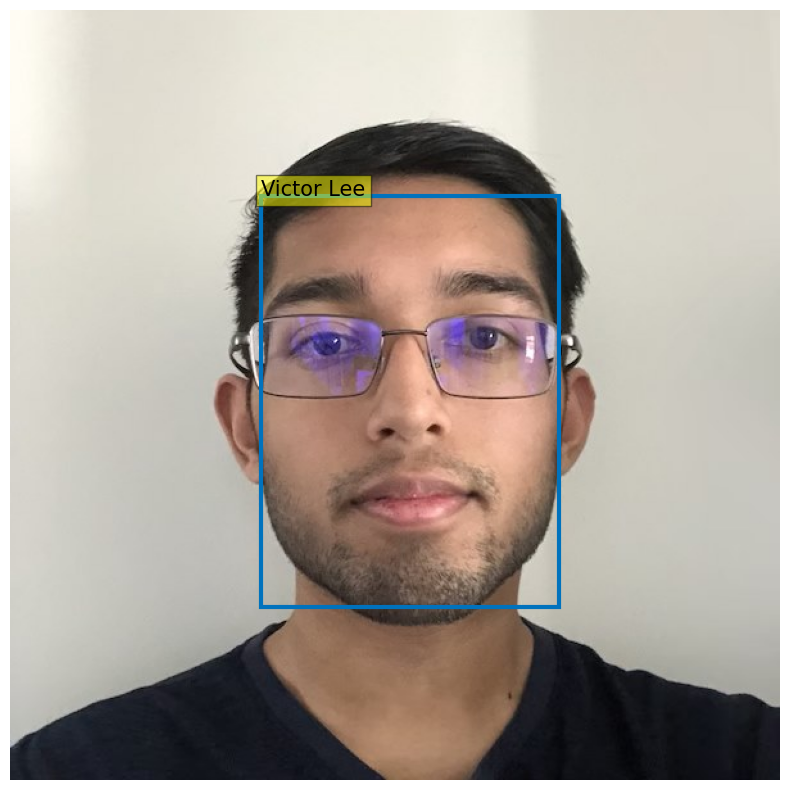

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


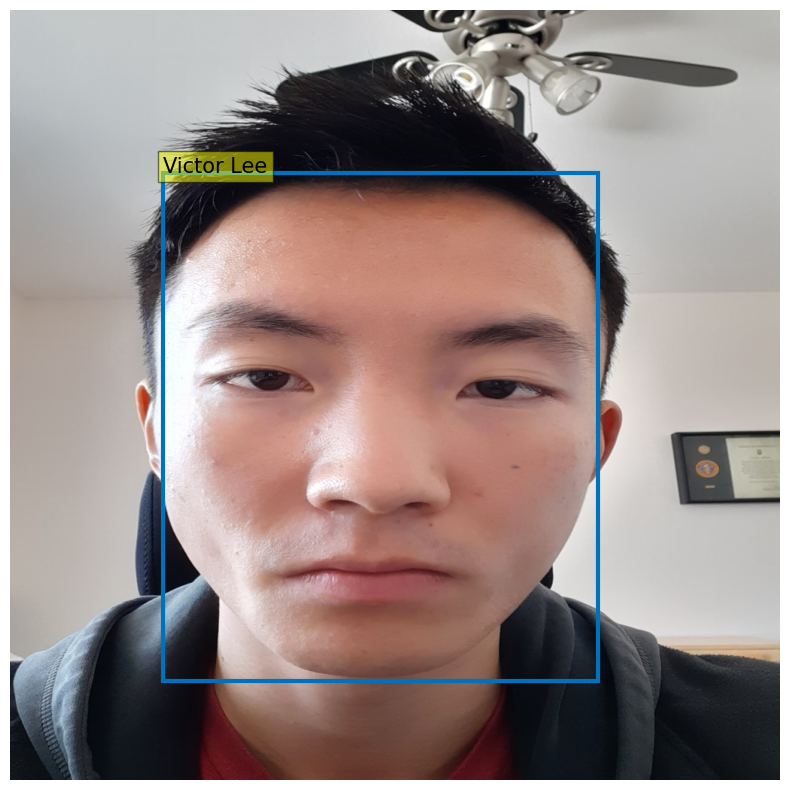

In [ ]:
import PIL
from PIL import Image
import torch
import numpy as np
import random

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

# URLs of the images
url1 = '/content/Facial_Recognition_t10/face_recognition_dataset/46.png'
url2 = '/content/Facial_Recognition_t10/face_recognition_dataset/47.png'
url3 = '/content/Facial_Recognition_t10/face_recognition_dataset/48.png'
url4 = '/content/Facial_Recognition_t10/face_recognition_dataset/6.png'


plot_classes = ["person"]

submission_dict = {}
the_image = PIL.Image.open(url1).convert("RGB")

scores, boxes = detect(the_image, face_detection_model, transform)
pp_face_embeds = []
for box in boxes:
    pp_face_embeds.append(facial_rec_base_model.predict(preprocess(the_image, box)))
predictions = predict_names(boxes, "a")
plot_predictions(the_image, scores, boxes, plot_classes, predictions)





the_image = PIL.Image.open(url2).convert("RGB")
the_image = the_image.resize((1024, 1024))  # Resize to a smaller, fixed size

scores, boxes = detect(the_image, face_detection_model, transform)
pp_face_embeds = []
for box in boxes:
    pp_face_embeds.append(facial_rec_base_model.predict(preprocess(the_image, box)))
# predictions = []

# for box in boxes:
#   face_embeding = preprocess(the_image, box)
#   predictions.append(infer(face_embeding))
predictions = predict_names(boxes, "b")
plot_predictions(the_image, scores, boxes, plot_classes, predictions)






the_image = PIL.Image.open(url3).convert("RGB")
the_image = the_image.resize((1024, 1024))  # Resize to a smaller, fixed size

scores, boxes = detect(the_image, face_detection_model, transform)
pp_face_embeds = []
for box in boxes:
    pp_face_embeds.append(facial_rec_base_model.predict(preprocess(the_image, box)))
# predictions = []

# for box in boxes:
#   face_embeding = preprocess(the_image, box)
#   predictions.append(infer(face_embeding))
predictions = predict_names(boxes, "c")
plot_predictions(the_image, scores, boxes, plot_classes, predictions)






the_image = PIL.Image.open(url4).convert("RGB")
the_image = the_image.resize((1024, 1024))  # Resize to a smaller, fixed size

scores, boxes = detect(the_image, face_detection_model, transform)
pp_face_embeds = []
for box in boxes:
    pp_face_embeds.append(facial_rec_base_model.predict(preprocess(the_image, box)))
# predictions = []

# for box in boxes:
#   face_embeding = preprocess(the_image, box)
#   predictions.append(infer(face_embeding))
predictions = predict_names(boxes, "d")
plot_predictions(the_image, scores, boxes, plot_classes, predictions)

In [ ]:
import csv

os.chdir("../../working")
with open('../input/c/2021-spring-coml-face-recognition-competition/kaggle_sample_submission.csv') as sample_submission_csv:
    with open("submission.csv", "w", newline = "") as submission_csv:
        sample_csv_reader = csv.DictReader(sample_submission_csv)
        open('submission.csv', 'w').close()
        submission_csv_writer = csv.DictWriter(submission_csv, sample_csv_reader.fieldnames)
        submission_csv_writer.writeheader()
        for row in sample_csv_reader:
            if row["id"] in submission_dict:
                submission_csv_writer.writerow({"id": row["id"],
                                                "xmin": submission_dict[row["id"]][0],
                                                "xmax": submission_dict[row["id"]][1],
                                                "ymin": submission_dict[row["id"]][2],
                                                "ymax": submission_dict[row["id"]][3]})
            else:
                submission_csv_writer.writerow({"id": row["id"],
                                                "xmin": 0,
                                                "xmax": 0,
                                                "ymin": 0,
                                                "ymax": 0})

In [ ]:
ls ..

**la résultat de détection**

In [ ]:
image_path = 'photo.jpg'
try:
  test_image = cv2.imread(image_path)

  res =DeepFace.verify(reference_image,test_image)

  if res["verified"] :
    print("---------------------------------------  C' est  vous -------------------------\n"
        + "****************************************Acces autoirse ******************************\n")
  else :
    print("--------------------------------------- non non ce n'est pas vous -------------------------\n"
        + "****************************************Acces  non autoirse ******************************\n")
except Exception as err:
  print("-------------------------------------- Aucun visage détéctéé ---------------------------")
